In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [81]:
# Date 컬럼을 Datetime형식으로 바꿔 NDate 컬럼을 만들어 추가하세요.
df['NDate'] = pd.to_datetime(df['Date'])
# Date 컬럼과, Volume 컬럼을 지우고 df1에 저장한 뒤 5개의 행을 출력하세요
df1 = df.drop(['Date','Volume'],axis=1)
df1.set_index('NDate',inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

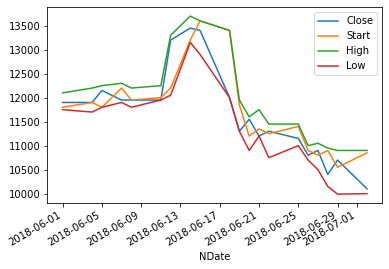

In [82]:
# df1을 선 그래프로 출력하세요
df1.plot()

<AxesSubplot:xlabel='NDate'>

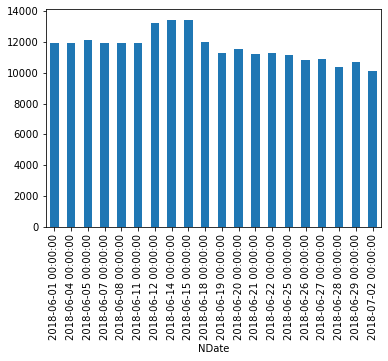

In [83]:
# df1의 Close를 막대그래프로 역순으로 출력하세요
df1['Close'][::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

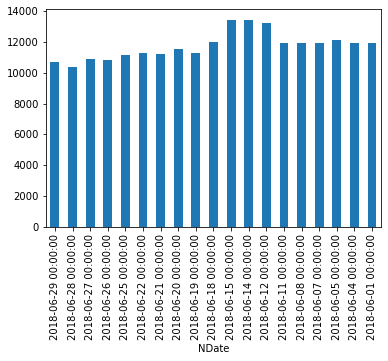

In [85]:
# 6월만 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요
df1.loc['2018-06','Close'].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

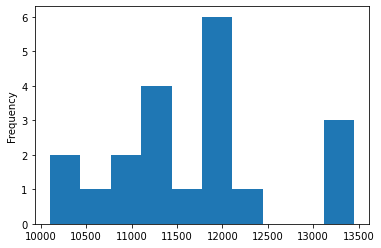

In [86]:
# Close 칼럼을 히스토그램으로 표현하세요
df1.Close.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

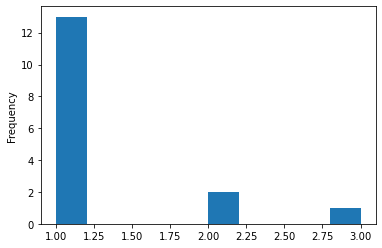

In [87]:
# Close 컬럼의 원소들을 히스토그램으로 출력하세요
df1.Close.value_counts().plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

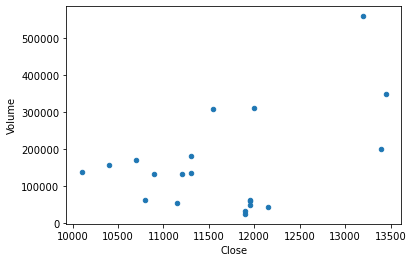

In [89]:
# Close 컬럼과 Volume 컬럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

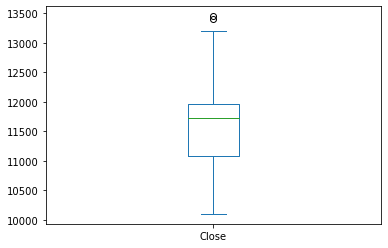

In [94]:
# Close 컬럼의 Boxplot을 표현하세요 그리고 통계요약표를 출력하세요
df.Close.plot(kind='box')
df.Close.describe()

In [97]:
# Close 컬럼의 이상치를 구하세요.
q1 = df['Close'].describe()['25%']
q3 = df['Close'].describe()['75%']

iqr = q3 - q1

df['Close'][(df['Close'] <= (q1 - 1.5 * iqr))|(df['Close'] >= (q3 + 1.5 * iqr))]

11    13400
12    13450
Name: Close, dtype: int64

11    13600
Name: Start, dtype: int64

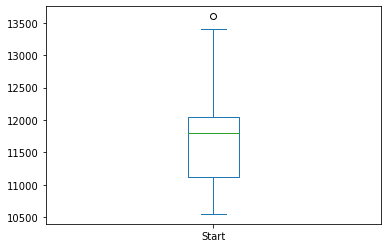

In [100]:
# Start 컬럼의 분포 및 이상치 여부를 탐색하는 Boxplot 및 이상치를 구하세요.
df.Start.plot(kind='box')

q1 = df['Start'].describe()['25%']
q3 = df['Start'].describe()['75%']

iqr = q3 - q1

df['Start'][(df['Start'] <= (q1 - 1.5 * iqr))|(df['Start'] >= (q3 + 1.5 * iqr))]

In [104]:
# 다음 데이터셋으로 남북한 인사이트를 탐색하고 특징을 요약해서 기술하세요. 
# subplot을 사용하여 3개이상의 그래프를 동시에 출력하세요
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

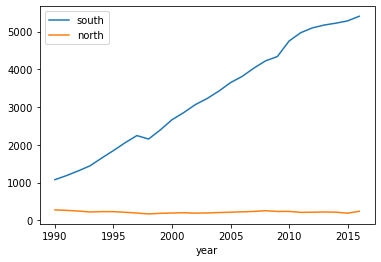

In [105]:
df_ep.set_index('year',inplace=True)
df_ep.plot() # 일반적인 그래프로는 차이가 많이 나서 비교가 어렵다

<AxesSubplot:xlabel='year'>

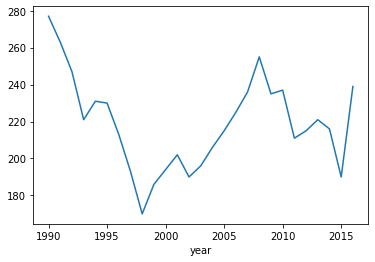

In [106]:
df_ep['north'].plot()
# 시간이 지나면 지날 수록 발전량이 떨어진다

<AxesSubplot:xlabel='year'>

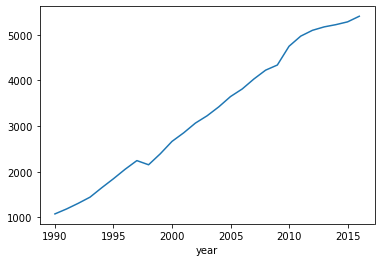

In [107]:
df_ep['south'].plot()
# 점점 발전량이 증가하는 추세다

<AxesSubplot:xlabel='year'>

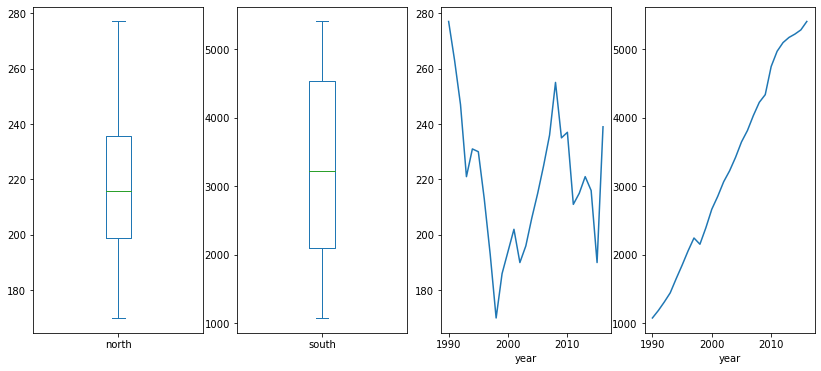

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
plt.subplot(1,4,1)
df_ep['north'].plot(kind='box')
plt.subplot(1,4,2)
df_ep['south'].plot(kind='box')
plt.subplot(1,4,3)
df_ep['north'].plot()
plt.subplot(1,4,4)
df_ep['south'].plot()

In [146]:
# df_auto의 각 컬럼을 시각화 해서 탐색한 후 인사이트를 기술하세요 (5개 이상)
df = pd.read_csv('dataset/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [151]:
df.info() # horsepower 데이터타입 문자열 원인 파악
df.horsepower.unique() # 원소중 ?가 있음
df.horsepower.replace('?',0,inplace=True) # 원소 ?를 0으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

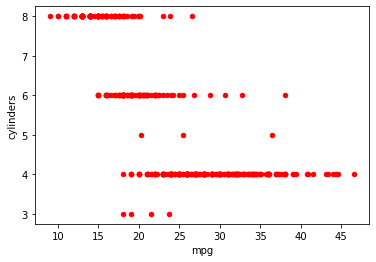

In [163]:
df.horsepower = df.horsepower.astype(int) # horsepower 데이터 타입 정수로 변경
df.plot(x='mpg',y='cylinders',color='red',kind='scatter') # 대부분의 자동차가 4기통인것을 확인


Text(0, 0.5, '연비')

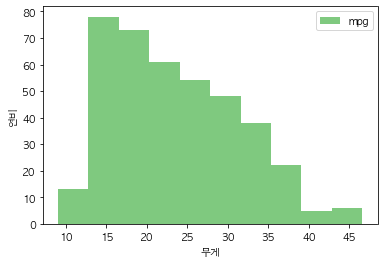

In [172]:
from matplotlib import rc
rc('font',family='AppleGothic')
df.plot(x='weight',y='mpg',kind='hist',color=sns.color_palette('Accent'))
plt.xlabel('무게')
plt.ylabel('연비')
# 무게가 적게 나갈 수록 연비가 더 좋다


Text(0, 0.5, '중량')

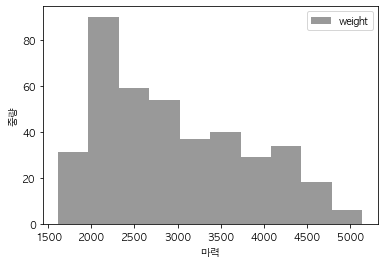

In [174]:
df.plot(x='horsepower',y='weight',kind='hist',color='black',alpha=0.4)
plt.xlabel('마력')
plt.ylabel('중량')

In [ ]:
# mpg 컬럼의 이상치를 구하세요